### 1. 목표 설정
- 보스턴 집값 데이터를 이용해서 회귀분석을 진행해보자.
- 특성곱을 이용해서 새로운 특성을 만들어보자.
- 규제 모델을 이용해서 모델의 복잡도를 제어해보자

### 2. 데이터 수집
- csv 파일 불러오기(보스턴 주택 데이터)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
boston = pd.read_csv('./data/boston_housing.csv')

In [5]:
boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


**특성 정보 확인**
- CRIM : 범죄율
- INDUS : 비소매상업지역의 면적 비율
- NOX : 대기중 일산화질소의 농도
- RM : 주택당 방의 개수
- LSTAT : 인구 중 하위 계층의 비율
- B : 인구 중 흑인의 비율
- PTRATIO : 학생 / 교사 비율
- ZN : 25,000 평방 피트를 초과한 거주지역의 비율
- CHAS : 찰스강의 경계에 위치한 경우는 1, 아닌 경우는 0
- AGE : 1940년 이전에 지어진 주택의 비율
- DIS : 직업센터의 거리
- TAX : 재산세율

**종속변수 확인**
- MEDV : 집값, 주택 가격

### 3. 데이터 전처리
- 결측치 없었다.
- 보스턴 주택 데이터는 학습용으로 제공된 데이터라 깔끔한 데이터이다.

### 4. EDA
- 생략

### 5. 모델링
- 데이터 분리(X_train, X_test, y_train, y_test)
- 모델 선정 및 학습 / 평가 / 예측

In [12]:
# 데이터 분리
# step.1 : 데이터를 분리하기 위한 모듈 불러오기
from sklearn.model_selection import train_test_split
# step.2 : 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(boston.iloc[:,:-1], boston.iloc[:,-1], random_state=42, test_size=0.3)
# step.3 : 데이터 분할 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((354, 13), (152, 13), (354,), (152,))

In [14]:
# 분할된 데이터를 가지고 상관계수 확인하기
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.205413,0.399643,-0.041852,0.402031,-0.210556,0.336697,-0.371149,0.622745,0.582164,0.296443,-0.304734,0.409681
ZN,-0.205413,1.000000,-0.544907,-0.031898,-0.527921,0.299282,-0.583271,0.672752,-0.318947,-0.306276,-0.375349,0.172134,-0.393315
INDUS,0.399643,-0.544907,1.000000,0.074533,0.764135,-0.407417,0.635749,-0.700550,0.579284,0.702541,0.362794,-0.333391,0.578976
CHAS,-0.041852,-0.031898,0.074533,1.000000,0.100199,0.139175,0.083140,-0.110392,0.047212,0.012041,-0.087582,0.071473,-0.103874
NOX,0.402031,-0.527921,0.764135,0.100199,1.000000,-0.305756,0.733034,-0.775599,0.595620,0.655932,0.169297,-0.339474,0.581960
RM,-0.210556,0.299282,-0.407417,0.139175,-0.305756,1.000000,-0.227609,0.217510,-0.219261,-0.296173,-0.345720,0.122512,-0.618609
AGE,0.336697,-0.583271,0.635749,0.083140,0.733034,-0.227609,1.000000,-0.753570,0.425143,0.475100,0.230440,-0.248012,0.550824
DIS,-0.371149,0.672752,-0.700550,-0.110392,-0.775599,0.217510,-0.753570,1.000000,-0.476497,-0.523633,-0.218248,0.269588,-0.474187
RAD,0.622745,-0.318947,0.579284,0.047212,0.595620,-0.219261,0.425143,-0.476497,1.000000,0.909381,0.481114,-0.403437,0.473225
TAX,0.582164,-0.306276,0.702541,0.012041,0.655932,-0.296173,0.475100,-0.523633,0.909381,1.000000,0.465101,-0.407992,0.525003


<Axes: >

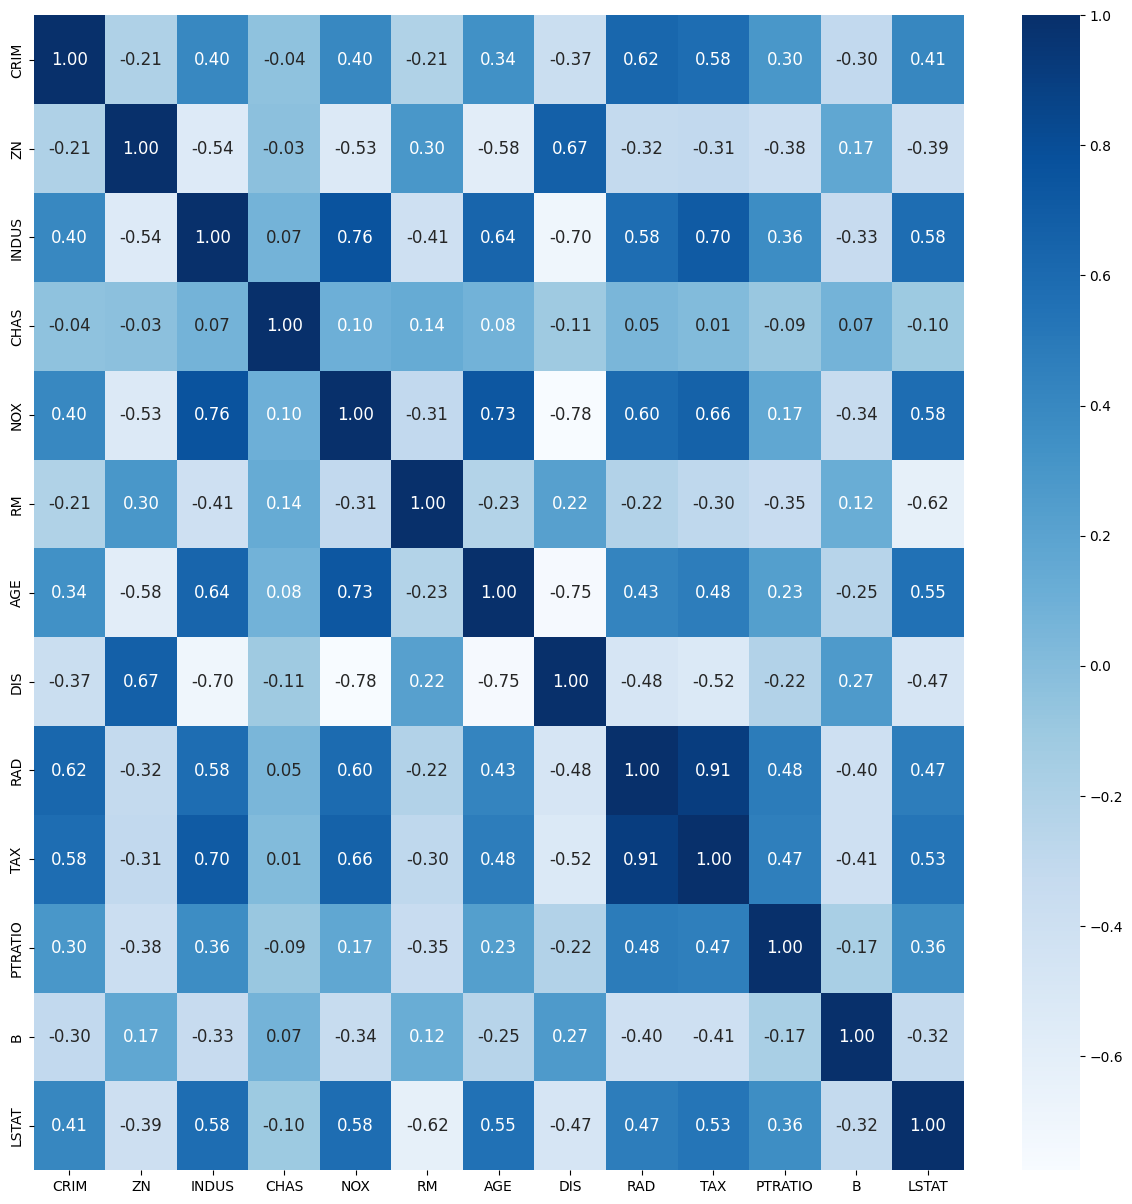

In [16]:
# 상관계수를 히트맵으로 출력
plt.figure(figsize=(15, 15))

sns.heatmap(data = X_train.corr(),
            annot = True, # 히트맵 내부에 글씨 출력
            annot_kws = {'size' : 12}, # 내부 글씨의 옵션(글씨의 크기)
            fmt = '.2f', # 소수점 자리 출력
            cmap = 'Blues' # 히트맵의 색상
           )
            

In [19]:
# 선형 회귀 모델 사용하기
# Step.1 : 모델 import
from sklearn.linear_model import LinearRegression

In [20]:
# Step.2 : 모델 객체 생성
lr = LinearRegression()

In [21]:
# Step.3 : 모델 학습
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
# Step.4 : 교차검증
from sklearn.model_selection import cross_val_score
result = cross_val_score(lr, X_train, y_train)
print(result)
print(result.mean())

[0.74541483 0.52216586 0.75607169 0.76738846 0.64887182]
0.6879825316957138


In [25]:
# 가중치 w 확인 해보기
lr.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [26]:
# 편향 b 값 확인 해보기
lr.intercept_

31.631084035694286

In [28]:
# 정답 예측
pre = lr.predict(X_test)
pre

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

- 회귀 평가 지표를 이용해서, 모델을 평가해보자
- mse, mae, rmse, r2_score

In [29]:
# 평가지표 import
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
# mse 사용하기
mean_squared_error(y_test, pre)

21.51744423117709

In [35]:
# mae 사용하기
mean_absolute_error(y_test, pre)

3.1627098714573947

In [36]:
# rmse 사용하기 (sklearn에서 자체적으로는 지원 x)
np.sqrt(mean_squared_error(y_test, pre))

4.638689926172808

In [37]:
# r2_score 사용하기
r2_score(y_test, pre)

0.7112260057484948

In [40]:
y_test.shape, pre.shape

((152,), (152,))